# 3D ribbon plot

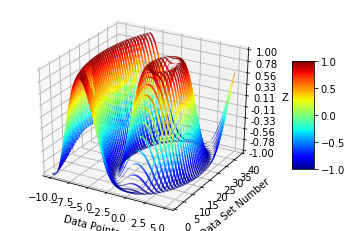

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

#create data
x = np.linspace(-10,5,200)
y = np.linspace(-5,5,40)
xGrid, yGrid = np.meshgrid(y, x)
z = np.sin(np.sqrt(xGrid**2 + yGrid**2))

numPts = x.shape[0]
numSets = y.shape[0]

fig = plt.figure()
ax = fig.gca(projection='3d')

#plot each "ribbon" as a surface plot with a certain width
ribbonWidth = 0.75
for i in np.arange(0,numSets-1):
    X = np.vstack((x,x)).T
    Y = np.ones((numPts,2))*i
    Y[:,1] = Y[:,0]+ribbonWidth
    Z = np.vstack((z[:,i],z[:,i])).T
    surf = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap=cm.jet,
                           linewidth=0, vmin=-1, vmax=1)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('Data Points')
ax.set_ylabel('Data Set Number')
ax.set_ylim((0,numSets))
ax.set_zlabel('Z')
ax.set_zlim((-1, 1))
fig.colorbar(surf, shrink=0.5, aspect=5)